In [41]:
import torch
from torch import nn              
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [42]:
transform=transforms.ToTensor()
dataset=datasets.MNIST(root="./data",train=True,download=True,transform=transform)

trainloader=torch.utils.data.DataLoader(dataset=dataset,batch_size=64,shuffle=True)

In [103]:
recon=[]
class Autoenc(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
    
    
    
        self.decoder = torch.nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )
    
    
    def forward(self,x):
        encoded=self.encoder(x)
        recon.append(encoded)
        decoded=self.decoder(encoded)
        return decoded
    
    
    

In [104]:
model = Autoenc()

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1, weight_decay = 1e8)

In [105]:
epochs = 10

outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in trainloader:
        image = image.reshape(-1, 28*28)

        reconstructed = model(image)
        loss = loss_function(reconstructed, image)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss)
    
    outputs.append((epochs, image, reconstructed))


In [119]:
a=recon[0]
a=np.array([t.detach().numpy() for t in a])

In [127]:
import numpy as np

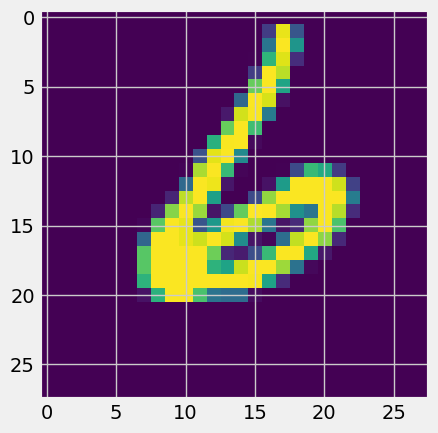

In [128]:
for i, item in enumerate(image):

    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])


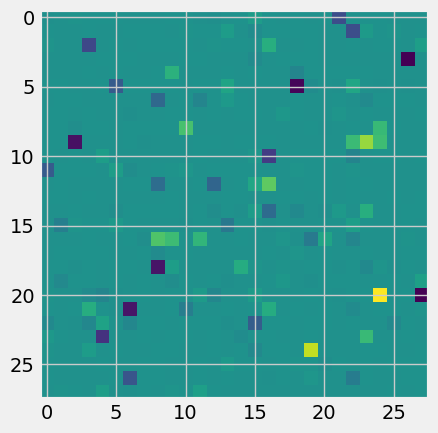

In [129]:
for i, item in enumerate(reconstructed):
    item = item.reshape(-1, 28, 28)
    item_new = item.clone().detach()
    plt.imshow(item_new[0])